## **KOMPARASI MODEL MACHINE LEARNING DALAM PREDIKSI PENYAKIT AIDS**

Data Source : https://www.kaggle.com/datasets/tanshihjen/aids-clinical-trials

**OVERVIEW**

Dataset AIDS Clinical Trials Group Study 175, yang pertama kali diterbitkan pada tahun 1996, menjadi kumpulan data yang sangat penting dalam penelitian kesehatan terkait pasien yang didiagnosis dengan AIDS. Tujuan utama dari pembuatan dataset ini adalah untuk mengeksplorasi kinerja dari dua jenis pengobatan AIDS yang berbeda, yaitu zidovudine (AZT) versus didanosine (ddI), AZT plus ddI, dan AZT plus zalcitabine (ddC). Sebuah permasalahan prediksi muncul dari dataset ini, yang mengharuskan untuk menentukan apakah setiap pasien akan meninggal dalam rentang waktu tertentu.

Dalam konteks ini, dataset menjadi landasan untuk memahami efektivitas pengobatan AIDS dan mengidentifikasi faktor-faktor yang mungkin berpengaruh terhadap prognosis pasien. Dengan menyediakan informasi statistik dan kategoris yang komprehensif, dataset ini memungkinkan peneliti untuk menggali hubungan antara jenis pengobatan yang diterima oleh pasien dan hasil akhir kesehatannya.

Seiring dengan perkembangan penelitian medis dan pengobatan AIDS, hasil dari analisis dataset ini dapat memberikan wawasan yang berharga bagi praktisi kesehatan, peneliti, dan pembuat kebijakan. Melalui penerapan metode machine learning, penelitian ini diharapkan dapat memberikan kontribusi dalam meningkatkan pemahaman kita terhadap perjalanan penyakit AIDS serta membantu dalam mengidentifikasi pendekatan pengobatan yang lebih efektif. Dengan demikian, dataset AIDS Clinical Trials Group Study 175 menjadi sebuah sumber daya yang berharga dalam upaya global untuk mengatasi pandemi HIV/AIDS.

## Import Library

In [ ]:
test_size = 0.2

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from prettytable import PrettyTable

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks/')

Mounted at /content/drive


## Load Dataset

In [ ]:
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/HIV Prediction/Data/AIDS_ClinicalTrial_GroupStudy175.csv')

In [ ]:
dataset

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,zprior,preanti,race,gender,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,label
0,948,2,48,89.8128,0,0,0,100,0,0,1,0,0,0,0,1,0,1,0,422,477,566,324,0
1,1002,3,61,49.4424,0,0,0,90,0,1,1,895,0,0,1,3,0,1,0,162,218,392,564,1
2,961,3,45,88.4520,0,1,1,90,0,1,1,707,0,1,1,3,0,1,1,326,274,2063,1893,0
3,1166,3,47,85.2768,0,1,0,100,0,1,1,1399,0,1,1,3,0,1,0,287,394,1590,966,0
4,1090,0,43,66.6792,0,1,0,100,0,1,1,1352,0,1,1,3,0,0,0,504,353,870,782,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2134,1091,3,21,53.2980,1,0,0,100,0,1,1,842,0,1,1,3,0,1,1,152,109,561,720,0
2135,395,0,17,102.9672,1,0,0,100,0,1,1,417,1,1,1,3,0,0,1,373,218,1759,1030,0
2136,1104,2,53,69.8544,1,1,0,90,0,1,1,753,1,1,1,3,0,1,0,419,364,1391,1041,0
2137,465,0,14,60.0000,1,0,0,100,0,0,1,0,0,1,0,1,0,0,0,166,169,999,1838,1


## Exploratory Data Analysis

In [ ]:
# cek duplikasi data

duplicates = dataset[dataset.duplicated()]
duplicates

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,zprior,preanti,race,gender,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,label


In [ ]:
# cek missing values

print("Missing Values : ")
print(dataset.isnull().sum())

Missing Values : 
time       0
trt        0
age        0
wtkg       0
hemo       0
homo       0
drugs      0
karnof     0
oprior     0
z30        0
zprior     0
preanti    0
race       0
gender     0
str2       0
strat      0
symptom    0
treat      0
offtrt     0
cd40       0
cd420      0
cd80       0
cd820      0
label      0
dtype: int64


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2139 entries, 0 to 2138
Data columns (total 24 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   time     2139 non-null   int64  
 1   trt      2139 non-null   int64  
 2   age      2139 non-null   int64  
 3   wtkg     2139 non-null   float64
 4   hemo     2139 non-null   int64  
 5   homo     2139 non-null   int64  
 6   drugs    2139 non-null   int64  
 7   karnof   2139 non-null   int64  
 8   oprior   2139 non-null   int64  
 9   z30      2139 non-null   int64  
 10  zprior   2139 non-null   int64  
 11  preanti  2139 non-null   int64  
 12  race     2139 non-null   int64  
 13  gender   2139 non-null   int64  
 14  str2     2139 non-null   int64  
 15  strat    2139 non-null   int64  
 16  symptom  2139 non-null   int64  
 17  treat    2139 non-null   int64  
 18  offtrt   2139 non-null   int64  
 19  cd40     2139 non-null   int64  
 20  cd420    2139 non-null   int64  
 21  cd80     2139 

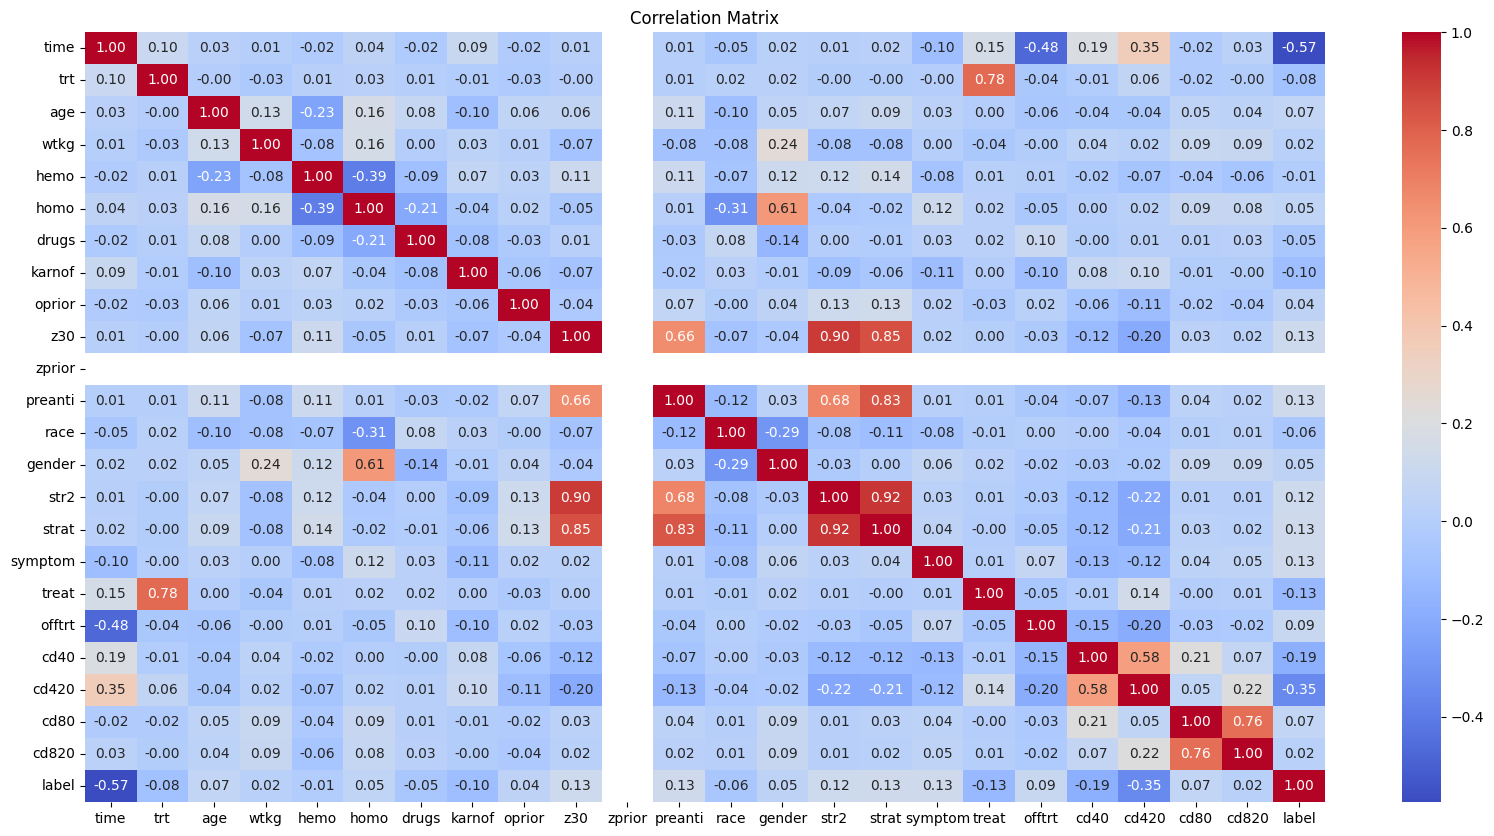

In [ ]:
# correlation matrix

plt.figure(figsize=(20, 10))
correlation_matrix = dataset.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
dataset.isnull().values.any()

False

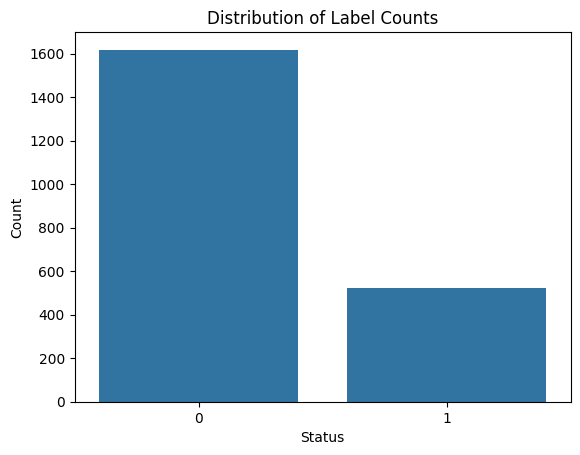

Count of each unique value in 'counts':
0    1618
1     521
Name: label, dtype: int64


In [ ]:
# Distribusi Fitur Target

sns.countplot(x='label', data=dataset)
plt.title('Distribution of Label Counts')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

counts = dataset['label'].value_counts()

print("Count of each unique value in 'counts':")
print(counts)

In [ ]:
x = dataset.drop(['label'], axis=1)
y = dataset.label

## Modelling & Evaluation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=test_size,random_state=42)
X_train.shape, X_test.shape

((1711, 23), (428, 23))

In [ ]:
def evaluate_model(true, predicted, is_regression=False):
    if is_regression:
        mae = mean_absolute_error(true, predicted)
        mse = mean_squared_error(true, predicted)
        rmse = np.sqrt(mean_squared_error(true, predicted))
        r2_square = r2_score(true, predicted)
        return mae, rmse, r2_square
    else:
        accuracy = accuracy_score(true, predicted)
        precision = precision_score(true, predicted)
        recall = recall_score(true, predicted)
        f1 = f1_score(true, predicted)
        roc_auc = roc_auc_score(true, predicted)
        return accuracy, precision, recall, f1, roc_auc

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "XGBoost Classifier": XGBClassifier(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "AdaBoost Classifier": AdaBoostClassifier(),
    "Naive Bayes Classifier": GaussianNB()
}

model_list = []
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
roc_auc_list = []

for model_name, model in models.items():
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    accuracy, precision, recall, f1, roc_auc=evaluate_model(y_test, y_test_pred, is_regression=False)


    print(model_name)
    print('Model performance for Test set')
    print("- Accuracy: {:.4f}".format(accuracy))
    print("- Precision: {:.4f}".format(precision))
    print("- Recall: {:.4f}".format(recall))
    print("- F1 Score: {:.4f}".format(f1))
    print("- ROC AUC Score: {:.4f}".format(roc_auc))
    print('='*35)
    print('\n')

    model_list.append(model_name)
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    roc_auc_list.append(roc_auc)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression
Model performance for Test set
- Accuracy: 0.8294
- Precision: 0.7000
- Recall: 0.4851
- F1 Score: 0.5731
- ROC AUC Score: 0.7105


Random Forest Classifier
Model performance for Test set
- Accuracy: 0.8808
- Precision: 0.8289
- Recall: 0.6238
- F1 Score: 0.7119
- ROC AUC Score: 0.7920


Gradient Boosting Classifier
Model performance for Test set
- Accuracy: 0.8902
- Precision: 0.8375
- Recall: 0.6634
- F1 Score: 0.7403
- ROC AUC Score: 0.8118


XGBoost Classifier
Model performance for Test set
- Accuracy: 0.8879
- Precision: 0.8118
- Recall: 0.6832
- F1 Score: 0.7419
- ROC AUC Score: 0.8171


Decision Tree Classifier
Model performance for Test set
- Accuracy: 0.8435
- Precision: 0.6848
- Recall: 0.6238
- F1 Score: 0.6528
- ROC AUC Score: 0.7675


K-Neighbors Classifier
Model performance for Test set
- Accuracy: 0.8271
- Precision: 0.6849
- Recall: 0.4950
- F1 Score: 0.5747
- ROC AUC Score: 0.7124


AdaBoost Classifier
Model performance for Test set
- Accuracy: 0.88

In [ ]:
pd.DataFrame(list(zip(model_list, accuracy_list)), columns=['Model Name', 'Accuracy Score']).sort_values(by=["Accuracy Score"])

,Model Name,Accuracy Score
7,Naive Bayes Classifier,0.810748
5,K-Neighbors Classifier,0.827103
0,Logistic Regression,0.829439
4,Decision Tree Classifier,0.843458
1,Random Forest Classifier,0.880841
6,AdaBoost Classifier,0.880841
3,XGBoost Classifier,0.887850
2,Gradient Boosting Classifier,0.890187


**Hasil Komparasi Model Machine Learning**

### Evaluation

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
model=GradientBoostingClassifier()
clf=model.fit(X_train, y_train)
pred=clf.predict(X_test)
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       327
           1       0.85      0.66      0.74       101

    accuracy                           0.89       428
   macro avg       0.88      0.81      0.84       428
weighted avg       0.89      0.89      0.89       428

[[315  12]
 [ 34  67]]


**Kesimpulan**


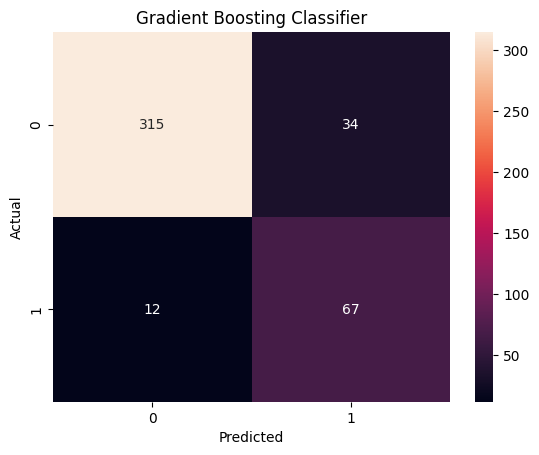

In [ ]:
# Confusion Matrix Random Forest
sns.heatmap(confusion_matrix(pred,y_test),annot = True,fmt = "d")
plt.title("Gradient Boosting Classifier")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

My Portfolio Website : [bit.ly/dutawicaksono](https://)
